<a href="https://colab.research.google.com/github/Sachitha03/Sales-Prediction-Analysis/blob/main/Sales_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA LOADING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORT PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
read_data = pd.read_csv('/content/drive/MyDrive/advertising.csv')

In [ ]:
print("Sales Predicition data - rows: ", read_data.shape[0], "columns: ", read_data.shape[1])

Sales Predicition data - rows:  200 columns:  4


In [ ]:
read_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**DATA VISUALIZATION**

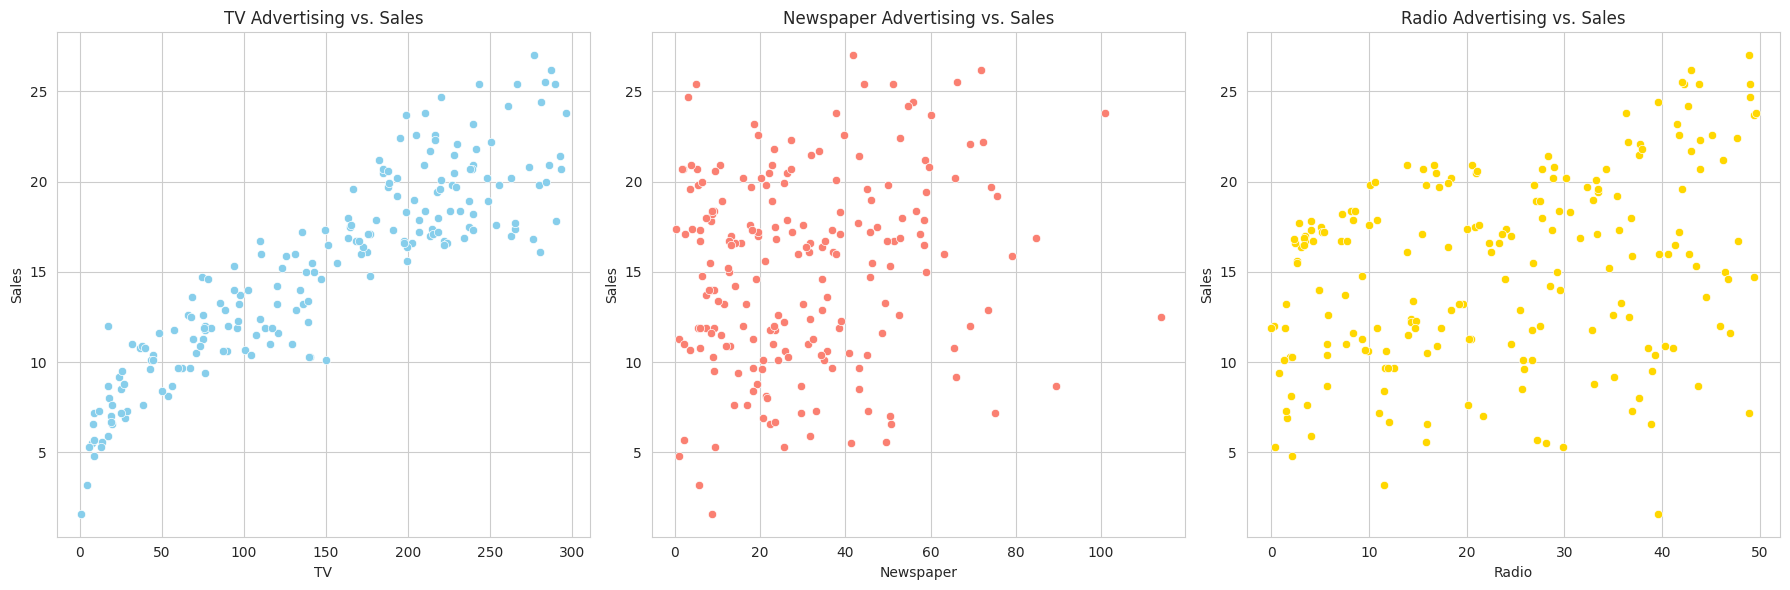

In [ ]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# TV vs. Sales
sns.scatterplot(x='TV', y='Sales', data=read_data, ax=axs[0], color='skyblue')
axs[0].set_title('TV Advertising vs. Sales')

# Newspaper vs. Sales
sns.scatterplot(x='Newspaper', y='Sales', data=read_data, ax=axs[1], color='salmon')
axs[1].set_title('Newspaper Advertising vs. Sales')

# Radio vs. Sales
sns.scatterplot(x='Radio', y='Sales', data=read_data, ax=axs[2], color='gold')
axs[2].set_title('Radio Advertising vs. Sales')

plt.tight_layout()
plt.show()


In [ ]:
read_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# MODEL ARCHITECTURE

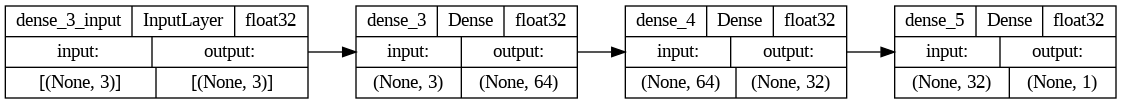

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),  # Input layer with 3 features (TV, Radio, Newspaper)
    Dense(32, activation='relu'),  # Hidden layer with 32 units
    Dense(1)  # Output layer with 1 unit (sales prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model architecture
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    rankdir="LR"  # Optional: specify the direction of the graph (left to right)
)


# DATA PREPROCESSING

In [ ]:
read_data.dropna(inplace=True)

Q1 = read_data['Sales'].quantile(0.25)
Q3 = read_data['Sales'].quantile(0.75)
IQR = Q3 - Q1
df = read_data[(read_data['Sales'] >= (Q1 - 1.5 * IQR)) & (read_data['Sales'] <= (Q3 + 1.5 * IQR))]

read_data.drop_duplicates(inplace=True)

In [ ]:
for i in read_data.columns:
    print(i)
    print('Skewness: ',read_data[i].skew())

TV
Skewness:  -0.06985336213274573
Radio
Skewness:  0.09417463149664404
Newspaper
Skewness:  0.8947204074986175
Sales
Skewness:  -0.07373923537186912


# EXPLORATORY DATA ANALYSIS

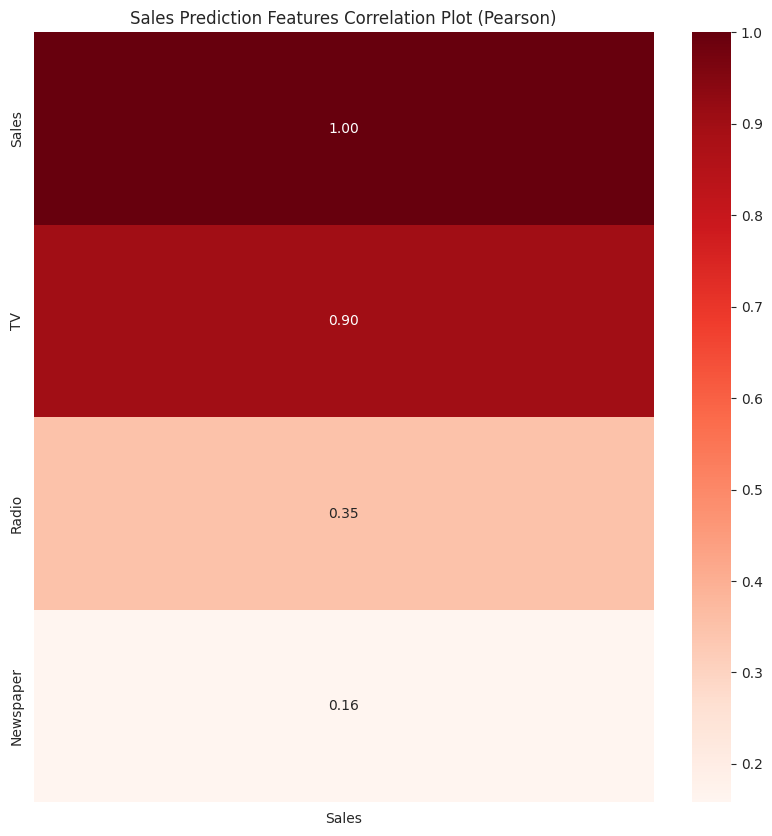

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Sales Prediction Features Correlation Plot (Pearson)')
corr = read_data.corr()['Sales'].sort_values(ascending=False)
sns.heatmap(corr.to_frame(), annot=True, cmap='Reds', fmt=".2f")
plt.show()


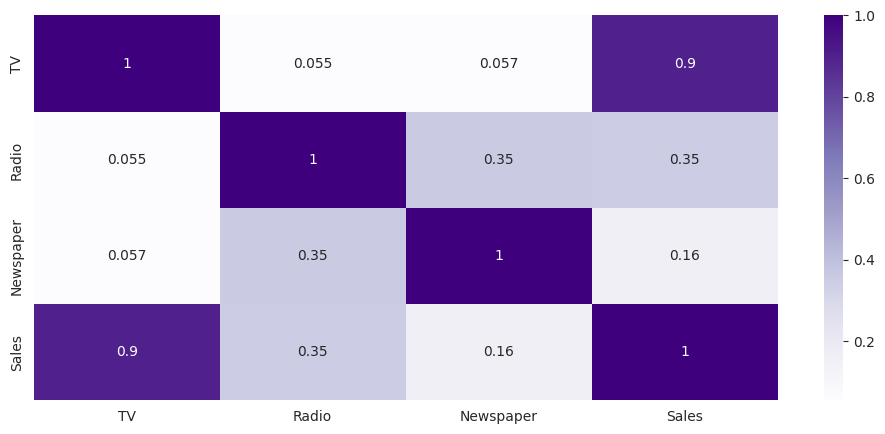

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(read_data.corr(),annot=True,cmap='Purples')
plt.show()

# MODEL TESTING AND EVALUATION

In [ ]:
X = read_data[['TV', 'Radio', 'Newspaper']]
y = read_data['Sales']

**SPLITTING DATASET INTO TRAINING AND TESTING SETS**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train.head()

,TV,Radio,Newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3


**MODEL TRAINING**

In [ ]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 2.794922378365978
Mean Absolute Error (MAE): 1.2355264850397343


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
params = {'fit_intercept': [True, False], 'positive': [True, False]}

grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_val, y_val)
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)

print("Best Hyperparameters:", best_params)
print("Validation MSE:", mse_val)

Best Hyperparameters: {'fit_intercept': True, 'positive': True}
Validation MSE: 2.58022143072104


**MODEL TESTING**

In [ ]:
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1.2341451459524484
Mean Squared Error (MSE): 2.58022143072104
Root Mean Squared Error (RMSE): 1.606306767314712


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on Test Data:", mse)

import joblib
joblib.dump(model, 'sales_prediction_model.pkl')

Mean Squared Error (MSE) on Test Data: 2.6360765623280655


['sales_prediction_model.pkl']

In [ ]:
params = {'fit_intercept': [True, False], 'positive': [True, False]}

grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_val, y_val)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

X_new = pd.DataFrame({
    'TV': [10, 25, 36],
    'Radio': [50, 100, 150],
    'Newspaper': [25, 55, 75]
})

y_new = best_model.predict(X_new)

print("Predictions:", y_new)


Predictions: [10.4149034  16.40990999 22.14351302]


# MODEL ACCURACY

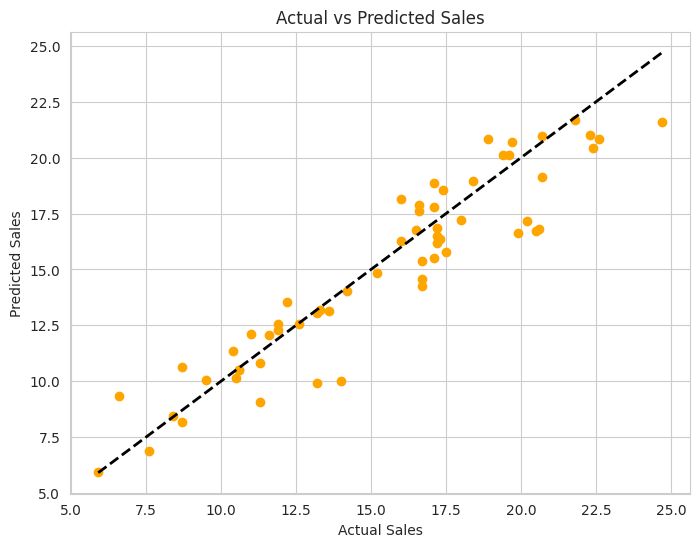

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


# Sales Prediction Visualization Script for Advertising Budgets

Enter TV advertising budget: 230.1
Enter radio advertising budget: 37.8
Enter newspaper advertising budget: 69.2


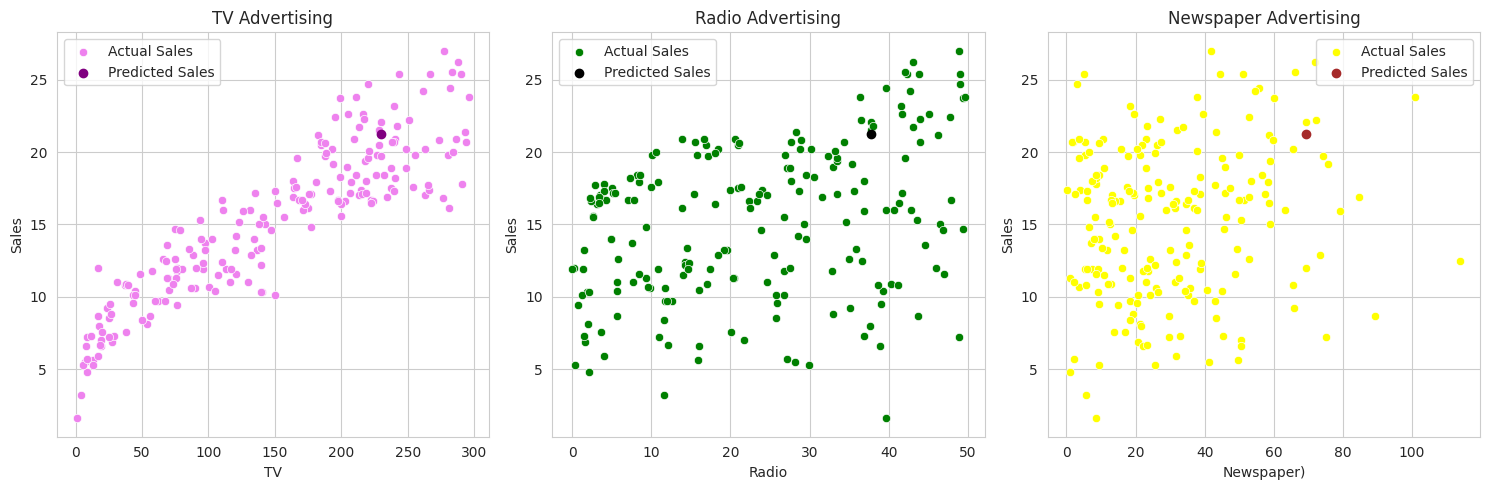

In [ ]:
sales_data = pd.read_csv('/content/drive/MyDrive/advertising.csv')

def visualize_sales_prediction(tv_budget, radio_budget, newspaper_budget):
    user_input = pd.DataFrame({'TV': [tv_budget], 'Radio': [radio_budget], 'Newspaper': [newspaper_budget]})

    X = sales_data[['TV', 'Radio', 'Newspaper']]
    y = sales_data['Sales']
    model = LinearRegression()
    model.fit(X, y)

    predicted_sales = model.predict(user_input)
    plt.figure(figsize=(15, 5))

    # Scatter plot of actual sales for TV advertising
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='TV', y='Sales', data=sales_data, color='violet', label='Actual Sales')
    plt.scatter(tv_budget, predicted_sales, color='purple', label='Predicted Sales')
    plt.title('TV Advertising')
    plt.xlabel('TV')
    plt.ylabel('Sales')
    plt.legend()

    # Scatter plot of actual sales for radio advertising
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='Radio', y='Sales', data=sales_data, color='green', label='Actual Sales')
    plt.scatter(radio_budget, predicted_sales, color='black', label='Predicted Sales')
    plt.title('Radio Advertising')
    plt.xlabel('Radio')
    plt.ylabel('Sales')
    plt.legend()

    # Scatter plot of actual sales for newspaper advertising
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='Newspaper', y='Sales', data=sales_data, color='yellow', label='Actual Sales')
    plt.scatter(newspaper_budget, predicted_sales, color='brown', label='Predicted Sales')
    plt.title('Newspaper Advertising')
    plt.xlabel('Newspaper)')
    plt.ylabel('Sales')
    plt.legend()

    plt.tight_layout()
    plt.show()

tv_budget = float(input("Enter TV advertising budget: "))
radio_budget = float(input("Enter radio advertising budget: "))
newspaper_budget = float(input("Enter newspaper advertising budget: "))
visualize_sales_prediction(tv_budget, radio_budget, newspaper_budget)